# Mandatory Assignment 1

This is the second of three mandatory assignments which must be completed during the course. Note that you only need to pass 2 out of 3 assignments to be eligible for the exam.

First some practical pieces of information:

* When is the assignment due?: **23:59, Friday, August 4, 2023.**
* Should I work with my group?: **Yes**. In particular, you should **only hand in 1 assignment per group (e.g., everyone in the group uploads the same notebook. We will randomly pick one) and in a comment on Absalon write your group number and all group members**. 

The assignment consists of problems from the exercise sets that you have solved so far, problems from the exercises that have been modified a little to better suit the structure of the assignment and finally also new problems not seen in the exercises. 

**Note**: 
- It is important that you submit your edited version of this [notebook](https://fileinfo.com/extension/ipynb#:~:text=An%20IPYNB%20file%20is%20a,Python%20language%20and%20their%20data.) as a **single .ipynb file**, and nothing else. Do not copy your answers into another notebook that you have made. 
- **Don't delete, modify, or copy, the empty non-editable (unless you specifically change the metadata) cells below each question. Those are hidden tests used by the `nbgrader` software to grade the assignment.**
- It is recommended to clone our [github repository](https://github.com/isdsucph/isds2023) and copy the entire `assignment1` folder to somewhere on your computer and complete the assignment in this folder.
- It is good practice to always restart your notebook and run all cells before submitting or delivering your notebook to somebody else. This is to make sure that all cells run without raising any errors breaking the flow of the notebook. 

In [71]:
from pathlib import Path
from zipfile import ZipFile
import pandas as pd

## Problems from Exercise Set 2:

This time we are going to **read the weather data from a csv file** located in this assignment directory instead of requesting the website.
The file is called `weather_data_1870-1875.csv` and consists of weather data for the period 1870-1875. The csv file contains data which has been constructed by concatenating the _non-processed_ data from 1870-1875. In a later exercise we will need metadata about the stations so the weather data comes bundled inside a zip file called `data.zip` together with the metadata files. 

First, we want to create a folder to extract the data inside the zip file to. We'll use the [`Path`](https://docs.python.org/3/library/pathlib.html#pathlib.Path) object from the [`pathlib`](https://docs.python.org/3/library/pathlib.html) module to create our data folder. With the `Path` object we can construct new file paths by using the `/` operator. For instance, to create a new folder called `some_dir` located inside the directory containing this notebook we can write 

```python
## Code snippet showing how to use the `/` operator
# Create Path object of new folder located inside 
# the current working directory of this notebook
fp = Path.cwd() / "some_dir"  
# Use the Path object to actually create the subfolder
Path.mkdir(fp, exist_ok=True)  
```
It is good practice to construct paths relative to the project directory. With `pathlib` this becomes easy, also across operating systems. If you are interested you can read more about the `pathlib` module [here](https://realpython.com/python-pathlib/).

> **Ex. 2.X.1 (Not seen in module 2):**
Use the code snippet above to create a subfolder located inside this directory named `data`. Store the path as a `Path` object inside the variable `fp_data`. We will use `fp_data` in the next exercise when extracting the zipfile's content.

In [72]:
## Code snippet showing how to use the `/` operator
# Create Path object of new folder located inside 
# the current working directory of this notebook
fp_data = Path.cwd() / "data"  
# Use the Path object to actually create the subfolder
Path.mkdir(fp_data, exist_ok=True) 

> **Ex. 2.X.2 (Not seen in module 2):** Use the [`zipfile`](https://docs.python.org/3/library/zipfile.html) module to extract the content of `data.zip` to the subfolder created above. 

> _Hint:_ Use the [`extractall`](https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.extractall) method of the `ZipFile` object. See [here](https://thispointer.com/python-how-to-unzip-a-file-extract-single-multiple-or-all-files-from-a-zip-archive/) for a guide.

In [73]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('data.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(path=fp_data)

> **Ex. 2.3.4:** The code below runs through some of the steps we completed in exercise 2.3.4 in Module 2. As we are not going to request the website but load the data from a csv file, your task is to **rewrite parts of the function**. In particular, you need to do the following:`
>1. Rename the function to `process_weather` instead of `load_weather`. 
>2. The function should now  take a `DataFrame` as input (the one we extracted from the zip file)
>3. Consider whether `df_weather.iloc[:, :4]` is necessary for the weather data loaded from  the csv file. The documentation string should also be rewritten appropriately. 
>4. The function contains a sorting step. **Change it so that it first sorts by _station_, then by _datetime_. The sorting should be ascending for _station_ and descending for _datetime_.** 
>5. After having rewritten the function, load the weather data from `'weather_data_1870-1875.csv'` into a pandas dataframe, apply the `process_weather` function to this dataframe, and store the result in the variable `df_weather_period`.

```python
def load_weather(year):
    """Function to structure and clean weather data.
    
    Structuring includes removing unused columns, renaming the 
    columns and selecting only observations of maximum temperature. 
    Cleaning includes inserting missing decimal, sorting and
    resetting the index.
    
    Args:
        year (int): given year to load data from e.g. 1870
        
    Returns:
        (pd.DataFrame): processed weather data for given input year
    """
    url = f"ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/{year}.csv.gz"

    # loads the data
    df_weather = pd.read_csv(url, header=None)\
                    .iloc[:,:4] 

    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]

    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year

    return df_out
```

In [151]:
def process_weather(df_weather):
    """Function to structure and clean weather data.
    
    Structuring includes removing unused columns, renaming the 
    columns and selecting only observations of maximum temperature. 
    Cleaning includes inserting missing decimal, sorting and
    resetting the index.
    
    Args:
        year (int): given year to load data from e.g. 1870
        
    Returns:
        (pd.DataFrame): processed weather data for given input year
    """

    
    # structure and clean data using methods chaining
    # note that the original columns now are strings when loading the csv file
    # and not integers as when downloading the data
    df_out = \
        df_weather\
            .rename(columns={'0': 'station', '1': 'datetime', '2': 'obs_type', '3': 'obs_value'})\
            .query("obs_type == 'TMAX'")\
            .assign(obs_value=lambda df: df['obs_value']/10)\
            .sort_values(by=['station', 'datetime'], ascending=[True, False])\
            .reset_index(drop=True)\
            .copy() 

    # area process
    df_out['area'] = df_out['station'].str[0:2]

    # datetime process
    df_out['datetime_dt'] = pd.to_datetime(df_out['datetime'], format = '%Y%m%d')
    df_out['month'] = df_out['datetime_dt'].dt.month
    df_out['year'] = df_out['datetime_dt'].dt.year

    return df_out

In [152]:
file_path = r'/Users/astridblixmogensen/OneDrive - University of Copenhagen/Dokumenter/Økonomi/7. Semester/Introduction to Social Data Science/assignment1-kopi/data/weather_data_1870-1875.csv'
df_weather = pd.read_csv(file_path)
df_weather_period = process_weather(df_weather)
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
132312,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870
132313,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870
132314,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870
132315,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870


> **Ex. 2.X.3 (Not seen in module 2):** Try to plot the observations value of `df_weather_period` by running `df_weather_period.obs_value.plot()`. Something seems off, right? Now try to inspect the problematic subset of the dataframe by running `df_weather_period[df_weather_period.obs_value < -50]`. What can these three observations be characterized as? Drop _all_ observations from the associated station from `df_weather_period`, reset the index and drop the column with the old index. Store the dataframe back into the variable `df_weather_period`.

<Axes: >

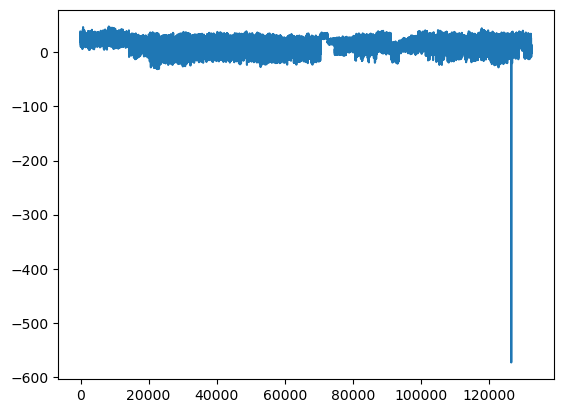

In [76]:
df_weather_period.obs_value.plot()

In [77]:
df_weather_period[df_weather_period.obs_value < -50]

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
126366,USW00023068,18751115,TMAX,-573.3,US,1875-11-15,11,1875
126397,USW00023068,18751015,TMAX,-573.3,US,1875-10-15,10,1875
126398,USW00023068,18751014,TMAX,-573.3,US,1875-10-14,10,1875


These observations could be outliers as the observation values seem extremely/unrealistically low. Thus, we remove these outliers from our dataset.

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875
...,...,...,...,...,...,...,...,...
132309,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870
132310,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870
132311,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870
132312,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870


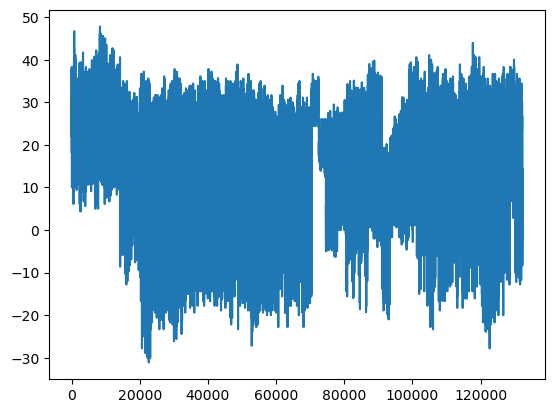

In [153]:
df_weather_period = df_weather_period[df_weather_period.obs_value >= -50]
df_weather_period = df_weather_period.reset_index(drop=True)
df_weather_period.obs_value.plot()
df_weather_period

> **Ex. 2.3.2:** 
Continuing with the `df_weather_period` from last exercise, do the following:
> 1. Convert the `area` column to a categorical variable. 
> 2. Transform the `obs_value` column from a continuous to a categorical variable by partitioning it into `3` intervals. The first interval should contain observations with values of `obs_value` up to the 10% quantile. The second interval should contain observations with values of `obs_value` up to the 90% quantile. The third interval should contain the rest of the observations. Call this new column for `obs_value_cat`.  This can be done using the `pd.qcut()` method.
> 3. Make another column with  `obs_value` as a categorical variable but this time label the 3 intervals as `["cold", "medium", "hot"]`. This can be done by specifying the `labels` parameter in the `pd.qcut()` method of pandas. Call this new column for `obs_value_cat_labeled`.

In [154]:
df_weather_period['area'] = df_weather_period['area'].astype('category')
cat_obs = df_weather_period['obs_value'].astype('category')
df_weather_period['obs_value_cat_labeled'] = pd.qcut(cat_obs, q=[0,.1,0.9,1.],labels=["cold", "medium", "hot"])
df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat_labeled
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875,hot
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875,hot
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875,hot
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875,hot
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875,hot
...,...,...,...,...,...,...,...,...,...
132309,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870,medium
132310,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870,medium
132311,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870,medium
132312,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870,medium


## Problems from Exercise Set 3:

> **Ex. 3.3.1:** Compute the mean and median maximum daily temperature for each month-year-station pair on the dataframe `df_weather_period` from last exercise by using the _split-apply-combine_ procedure. Store the results in new columns `tmax_mean` and `tmax_median`.

In [155]:
split_vars = ['month','year', 'station'] 
apply_vars = ['obs_value']
apply_fcts = [ 'mean', 'median']
df_weather_period['tmax_mean'] = df_weather_period.groupby(split_vars)[apply_vars].transform('mean')
df_weather_period['tmax_median'] = df_weather_period.groupby(split_vars)[apply_vars].transform('median')

df_weather_period

,station,datetime,obs_type,obs_value,area,datetime_dt,month,year,obs_value_cat_labeled,tmax_mean,tmax_median
0,ASN00048013,18751117,TMAX,38.3,AS,1875-11-17,11,1875,hot,32.241176,31.9
1,ASN00048013,18751116,TMAX,33.8,AS,1875-11-16,11,1875,hot,32.241176,31.9
2,ASN00048013,18751115,TMAX,32.8,AS,1875-11-15,11,1875,hot,32.241176,31.9
3,ASN00048013,18751114,TMAX,35.6,AS,1875-11-14,11,1875,hot,32.241176,31.9
4,ASN00048013,18751113,TMAX,29.7,AS,1875-11-13,11,1875,hot,32.241176,31.9
...,...,...,...,...,...,...,...,...,...,...,...
132309,USW00094728,18700105,TMAX,1.1,US,1870-01-05,1,1870,medium,6.564516,6.7
132310,USW00094728,18700104,TMAX,1.7,US,1870-01-04,1,1870,medium,6.564516,6.7
132311,USW00094728,18700103,TMAX,5.0,US,1870-01-03,1,1870,medium,6.564516,6.7
132312,USW00094728,18700102,TMAX,12.2,US,1870-01-02,1,1870,medium,6.564516,6.7


**Ex. 3.3.2:** Plot the monthly max,min, mean, first and third quartiles for maximum temperature for the station with ID _'CA006110549'_ from `df_weather_period`. Export the figure as an `png` file with the name `station_data_plot_new.png`.

> *Hint*: the method `describe` computes all these measures. Try to make your plot look like the one below. 

<img src="station_data_plot.png">

In [97]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

%matplotlib inline

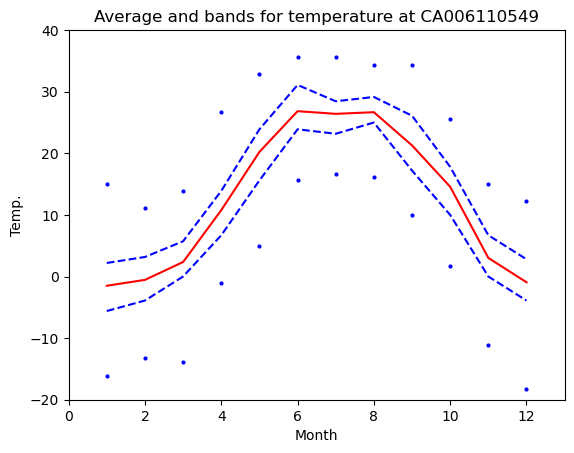

In [161]:
df_weather_period_CA006110549 = df_weather_period[(df_weather_period['station']=='CA006110549')]

weather_merge_1 = df_weather_period_CA006110549.drop(['station', 'datetime', 'obs_type', 'tmax_median'], axis=1)


split_vars = ['month'] 
apply_vars = ['obs_value']
types = ['mean']
weather_merge_2 = weather_merge_1.groupby(split_vars)[apply_vars].describe()
weather_merge_2 = weather_merge_2['obs_value']
#plt.plot(weather_merge_2[['mean','min','max','25%','75%']])

fig, ax1 = plt.subplots()

props = {
    'xlim': [0, 13],
    'ylim': [-20, 40]
}

plt.plot(weather_merge_2['mean'], color='red')
plt.plot(weather_merge_2['min'], marker = 'o', linestyle=' ', color='blue', markersize=2)
plt.plot(weather_merge_2['max'], marker = 'o', linestyle=' ', color='blue', markersize=2)
plt.plot(weather_merge_2['25%'], linestyle = '--', color='blue')
plt.plot(weather_merge_2['75%'], linestyle = '--', color='blue')


ax1.set(**props)

ax1.set_xlabel("Month")
ax1.set_ylabel("Temp.")
ax1.set_title("Average and bands for temperature at CA006110549")

# Question 4
plt.savefig('station_data_plot_new.png')


> **Ex. 3.3.3: (MODIFIED FOR ASSIGNMENT 1)** We want to use the location data of the weather stations and merge this onto `df_weather_period`. The file with station location data is called  `ghcnd-stations.txt` and is stored in the `data.zip` file. Therefore, by Ex. 2.X.2, it should now be located in the `data` folder of this directory. `pandas` has a function named [`read_fwf`](https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html) which can be used to read a txt file with a fixed width format (each variable spans a fixed amount of columns). The function is neat and can infer how many columns each variable spans automatically (if the `infer_nrows` parameter is set properly). One can also manually set the `colspecs` parameter equal to a list of tuples containing the fixed-width intervals that the variables span. In the following exercise we will use some extra time and do the job manually to practice our txt file and string skills. Specifically, we will extract the list of tuples with fixed-widht information together with the column names and datatypes from the `ghcnd-stations-column-metadata.txt` file (also included in the `data.zip` file). 

> The `ghcnd-stations-column-metadata.txt` file looks like this: 

```
------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------
```

> **Ex. 3.3.3.1:** Read the `ghcnd-stations-column-metadata.txt` using the `with` keyword, see [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files), and store it in a variable called `column_metadata`. 

In [200]:
with open(fp_data / 'ghcnd-stations-column-metadata.txt', 'r', encoding = 'utf-8') as f:
    read_data = f.read()
print(read_data)

------------------------------
Variable   Columns   Type
------------------------------
ID            1-11   Character
LATITUDE     13-20   Real
LONGITUDE    22-30   Real
ELEVATION    32-37   Real
STATE        39-40   Character
NAME         42-71   Character
GSN FLAG     73-75   Character
HCN/CRN FLAG 77-79   Character
WMO ID       81-85   Character
------------------------------



> **Ex. 3.3.3.2:** Split `column_metadata` into a list of strings by applying the method `split` with the proper argument. Subset the resulting list and extract all lines from index `3` to `12` (non-inclusive) of the variable. Store the final list in a variable named `lines`. Inspect the result to make sure the relevant rows of the txt file has been extracted.

In [202]:
lines=read_data.split('\n')[3:12]
lines

['ID            1-11   Character',
 'LATITUDE     13-20   Real',
 'LONGITUDE    22-30   Real',
 'ELEVATION    32-37   Real',
 'STATE        39-40   Character',
 'NAME         42-71   Character',
 'GSN FLAG     73-75   Character',
 'HCN/CRN FLAG 77-79   Character',
 'WMO ID       81-85   Character']

> **Ex. 3.3.3.3:** Inspecting each line of the `lines` variable we see that the information about the column widths are all located from index `13` up and including index `17`. Finish the `get_colspecs` function below to extract the fixed width information from the `lines` variable by completing the steps below:
1. Use a list comprehension to loop through each line of the file
2. Index each line by the relevant indices written above
3. Strip leading whitespace of each element (if necessary)

> Finally, apply `get_colspecs` to the `lines` variable and store the result in a new variable called `colspecs`.

In [211]:
def get_colspecs(lines):
    """Extracts colspecs from `ghcnd-stations-column-metadata.txt`.
    
    Args:
        lines (list[str]): 
            list of relevant rows from `ghcnd-stations-column-metadata.txt` 
    
    Returns:
        (list[str]): 
            list of extracted colspecs i.e. ['1-11', '13-20', ..., '81-85']
    """
    colspec_idx_start = 13
    colspec_idx_end = 17 + 1  # Including idx 17
    colspecs = []
    for i in lines:
        x = i[colspec_idx_start:colspec_idx_end]
        colspecs.append(x.strip())
    return colspecs


colspecs = get_colspecs(lines)
colspecs

['1-11',
 '13-20',
 '22-30',
 '32-37',
 '39-40',
 '42-71',
 '73-75',
 '77-79',
 '81-85']

> **Ex. 3.3.3.4:** Write a function named `get_colspec_pair` which takes as input a string variable named `colspec` and returns a tuple of integers. Specifically, the function should take a string similar to each element of `colspecs`, split this string by `-` and return a tuple of integers where
1. The first integer should have `1` subtracted from it (Python is 0-indexed!)
2. The second integer should stay as it is (the intervals provided to the pandas function `read_fwf` should be non-inclusive)
> As an example, applying the function to `"1-11"` and `"13-20"` should yield the following results:

```python
print(get_colspec_pair("1-11"))
## output: (0, 11)

print(get_colspec_pair("13-20"))
## output: (12, 20)
```


In [263]:
def get_colspec_pair(colspecs):
    y = colspecs.split('-')
    q = [1,0]
    z = [int(m) for m in y]
    result = [a-b for a,b in zip(z,q)]
    w = tuple(result)
    
    return w

print(get_colspec_pair("1-11"), get_colspec_pair("13-20")) 


(0, 11) (12, 20)


> **Ex. 3.3.3.5:** Use the `get_colspec_pair` function in a list comprehension where you apply the function to each element in `colspecs`. Store the result in a variable named `colspec_pairs`

In [265]:
colspec_pairs = []
for i in colspecs:
    colspec_pairs.append(get_colspec_pair(i))
colspec_pairs

[(0, 11),
 (12, 20),
 (21, 30),
 (31, 37),
 (38, 40),
 (41, 71),
 (72, 75),
 (76, 79),
 (80, 85)]

> **Ex. 3.3.3.6:** Because the fixed width column information spans the interval from `13` up and including index `17`, we know that the entries from `0` to `13` (non-inclusive) are the column names and the entries from `18` to the end of each line are the data types. Write two functions named `get_column_names` and `get_column_dtypes` which return a list of column names and a list of the data types of the columns, respectively. Remember to strip all redundant whitespace using the string method `strip`. Apply the function `get_column_names` to the `lines` variable and store the output in a variable named `column_names`. Likewise, apply the function `get_column_dtypes` to the `lines` variable and store the output in a variable named `column_dtypes`.

In [282]:
def get_column_names(lines):
    colspec_idx_start = 0
    colspec_idx_end = 12 + 1
    colspecs = []
    for i in lines:
        x = i[colspec_idx_start:colspec_idx_end]
        colspecs.append(x.strip())
    return colspecs


column_names = get_column_names(lines)
column_names

def get_column_dtypes(lines):
    colspec_idx_start = 18
    colspec_idx_end = 30
    colspecs = []
    for i in lines:
        x = i[colspec_idx_start:colspec_idx_end]
        colspecs.append(x.strip())
    return colspecs


column_dtypes = get_column_dtypes(lines)
column_dtypes

['Character',
 'Real',
 'Real',
 'Real',
 'Character',
 'Character',
 'Character',
 'Character',
 'Character']

> **Ex. 3.3.3.7:** Replace each `"character"` entry with `"str"` and each `"real"` entry with `"float32"` of the list `column_dtypes`. Store the result of this in the same variable `column_dtypes`. 

In [290]:
# YOUR CODE HERE
temp = []
for i in column_dtypes:
    temp1 = i.replace('Character', 'str')\
            .replace('Real','float32')
    temp.append(temp1)
column_dtypes=temp
column_dtypes

['str', 'float32', 'float32', 'float32', 'str', 'str', 'str', 'str', 'str']

> **Ex. 3.3.3.8:** Load the `ghcnd-stations.txt` data using the `read_fwf` method of pandas setting the `names` parameter equal to `column_names` and the `colspecs` parameter equal to  `colspec_pairs`. Store the result in a variable named `locations`. Next, use the `astype` method on `locations` to set the dtypes of the columns. Use the `col_to_dtype` mapping below as input argument to `astype`. Finally, rename the `id` column to `station` and left-merge `locations` onto `df_weather_period`. Store the merged dataframe in the variable `df_weather_merged`.

In [293]:
#col_to_dtype = dict(zip(column_names, column_dtypes))


jupyter notebook --NotebookApp.ioub_data_rate_limit=10000000.0
# YOUR CODE HERE
#with open(fp_data / 'ghcnd-stations.txt', 'r', encoding = 'utf-8') as f:
    #read_data2 = f.read()
#print(read_data2)

SyntaxError: invalid syntax (2168389552.py, line 4)

> **Ex. 3.3.3.9:** Subset `df_weather_period` by all weather stations in Ontario (all stations in Ontario have `state == "ON"`) and store the resulting DataFrame in `df_ontario`. Compute the average `obs_value` for each `station`. Store the result in a dictionary named `avg_obs_value_ontario` with the keys being the station names and the values the average `obs_value`. Finally, subset the `locations` dataframe by the querying all stations contained in the keys of `avg_obs_value_ontario`. Store the result in `locations_ontario`. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

> **Ex. 3.3.3.10 (OPTIONAL)**: The following exercise does not count towards the grade of this assignment. Let's try to plot the stations for Ontario on a map of Ontario. We'll use the [`folium`](http://python-visualization.github.io/folium/) package to do this. This package is not pre-installed with `anaconda`. Run the cell below to install the package or open up your terminal, activate your preferred conda environment and type `!pip install folium`. 

In [ ]:
!pip install folium

> **Ex. 3.3.3.10 (continued)**:
> We want to plot the stations in `locations_ontario` on top of a map of Ontario. To do this, we need to create a `folium.Marker` for each station and place this on the folium map named `m` in the cell below starting with `import folium`. To accomplish this do the following:
- Iterate through the `zipper` defined in the cell below using a list comprehension and apply the `get_marker` function at each iteration. 
    - The `zipper` object yields a tuple of 4 values in each iteration. 
- The `avg_temp` argument of `get_marker` should take the value of each given station from the `avg_obs_value_ontario` dictionary created in the previous exercise. If the loop variable corresponding to `locations_ontario.station` is named `station_id` the value can be computed by subsetting the dictionary as  `avg_obs_value_ontario[station_id]`.
- Store the result in a variable named `markers_ontario`. The result should be a list of `folium.Markers` for each of the stations.

The resulting plot should be an interactive plot similar to the one in the cell below

In [ ]:
# Resulting folium plot
from IPython.display import Image
Image(filename='ontario-example-plot.png') 

In [ ]:
import folium


def get_marker(lat, lon, station_name, avg_obs_value, icon='cloud', color="blue"):
    """Creates a `folumn.Marker` for a given station
    
    Args:
        (lat): lattitude of station
        (lon): longitude of station
        (station_name): name of station
        (avg_obs_value): avg. obs_value for given station
        
    Returns:
        (folium.Marker): object to be added to a folium map
    """
    popup = "\n".join([station_name, f"Avg. obs_value: {avg_obs_value:.2f}"])
    marker = folium.Marker(
        location=[lat, lon],
        popup=popup,
        icon=folium.Icon(icon=icon, color=color, )
    )
    return marker


# Create folium map centered on Ontario
# COORDS_ONTARIO = (51.730703, -86.938937)
COORDS_ONTARIO = (43.40168574192175, -80.33021323830818)
m = folium.Map(location=COORDS_ONTARIO, zoom_start=6)

# Zipper object to iterate through
zipper = zip(
    locations_ontario.latitude,
    locations_ontario.longitude,
    locations_ontario.name,
    locations_ontario.station   
)

# YOUR CODE HERE
raise NotImplementedError()

# add weather station markers to map 
for station_marker in markers_ontario:  
    station_marker.add_to(m)
m  # Display map

## Problems from Exercise Set 4:

> **Ex. 4.3.5 (sligthly modified):** This exercise consists of a set of small subelements: 
>
> 0. Show the first five rows of the titanic dataset. What information is in the dataset?
> 1. Use a barplot to show the probability of survival for men and women within each passenger class. 
> 2. Can you make a boxplot showing the same information (why/why not?). 
> 3. Show a boxplot for the fare-prices within each passenger class. 
> 4. Create a new subfolder as done in Ex. 2.X.1 this time named `figs`. Use the same approach as in Ex. 2.X.1 and store the `Path` object in a variable named `fp_figs`. 
> 5. Combine the two of the figures you created above into a two-panel figure and save it on your computer in the `figs` subfolder with the name `Example2.png`.

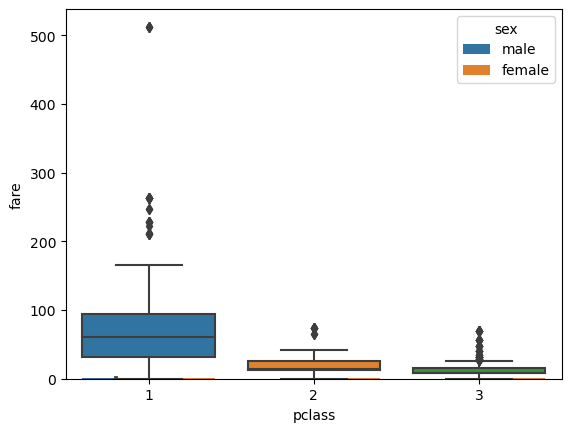

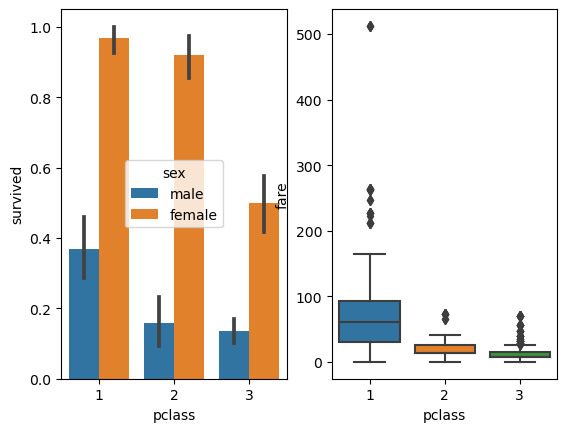

In [191]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

%matplotlib inline 

titanic = sns.load_dataset('titanic')
titanic.iloc[:5]

f,ax = plt.subplots()
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic)

#The boxplot can not be made for 3 dimensions

sns.boxplot(x='pclass', y='fare', data=titanic)

fp_figs = Path.cwd() / "figs"  
Path.mkdir(fp_figs, exist_ok=True)

f1,ax1 = plt.subplots(1,2)

sns.barplot(x='pclass', y='survived', hue='sex', data=titanic, ax=ax1[0])
sns.boxplot(x='pclass', y='fare', data=titanic, ax=ax1[1])

plt.savefig('/Users/astridblixmogensen/OneDrive - University of Copenhagen/Dokumenter/Økonomi/7. Semester/Introduction to Social Data Science/assignment1-kopi/figs/Example2.png')

> **Ex. 4.3.6:** Using the iris flower dataset, draw a scatterplot of sepal length and petal length. Include a second order polynomial fitted to the data. Add a title to the plot and rename the axis labels. Export your figure to the `figs` subfolder using the name `iris.png`.
>
> _Write 3 sentences:_ Is this a meaningful way to display the data? What could we do differently?
>
> For a better understanding of the dataset this image might be useful:

> <img src="example-iris-q436.png" alt="Drawing" style="width: 200px;"/>
>
> _Hint:_ Use the `.regplot` method from seaborn. 

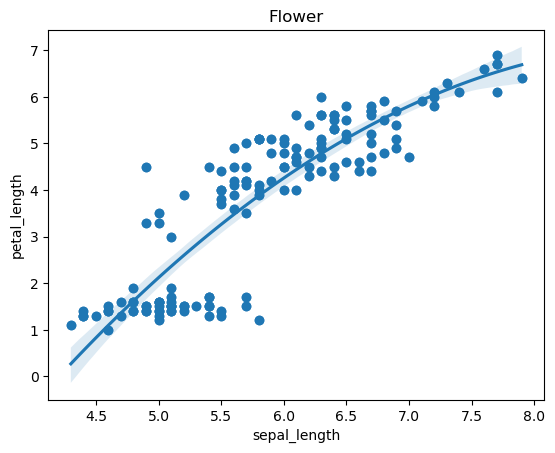

In [192]:
# YOUR CODE HERE
iris = sns.load_dataset('iris')
iris

fig, ax = plt.subplots()
ax.scatter(x=iris['sepal_length'], y=iris['petal_length'])
ax.set(xlabel='sepal_length', ylabel='petal_length');
ax.set_title('Flower')

sns.regplot(x=iris['sepal_length'], y=iris['petal_length'], data=iris, order=2)

plt.savefig('/Users/astridblixmogensen/OneDrive - University of Copenhagen/Dokumenter/Økonomi/7. Semester/Introduction to Social Data Science/assignment1-kopi/figs/iris.png')

# The data could be exploited more by using the with of the petal and sepal, and if they vary between species

In [193]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> **Ex. 4.3.7:** Use [pairplot with hue](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to create a figure that clearly shows how the different species vary across measurements in the iris dataset. Change the color palette and remove the shading from the density plots. Store the new figure under `figs/pairplot.png`. _Bonus:_ Try to explain how the `diag_kws` argument works (_hint:_ [read here](https://stackoverflow.com/questions/1769403/understanding-kwargs-in-python))

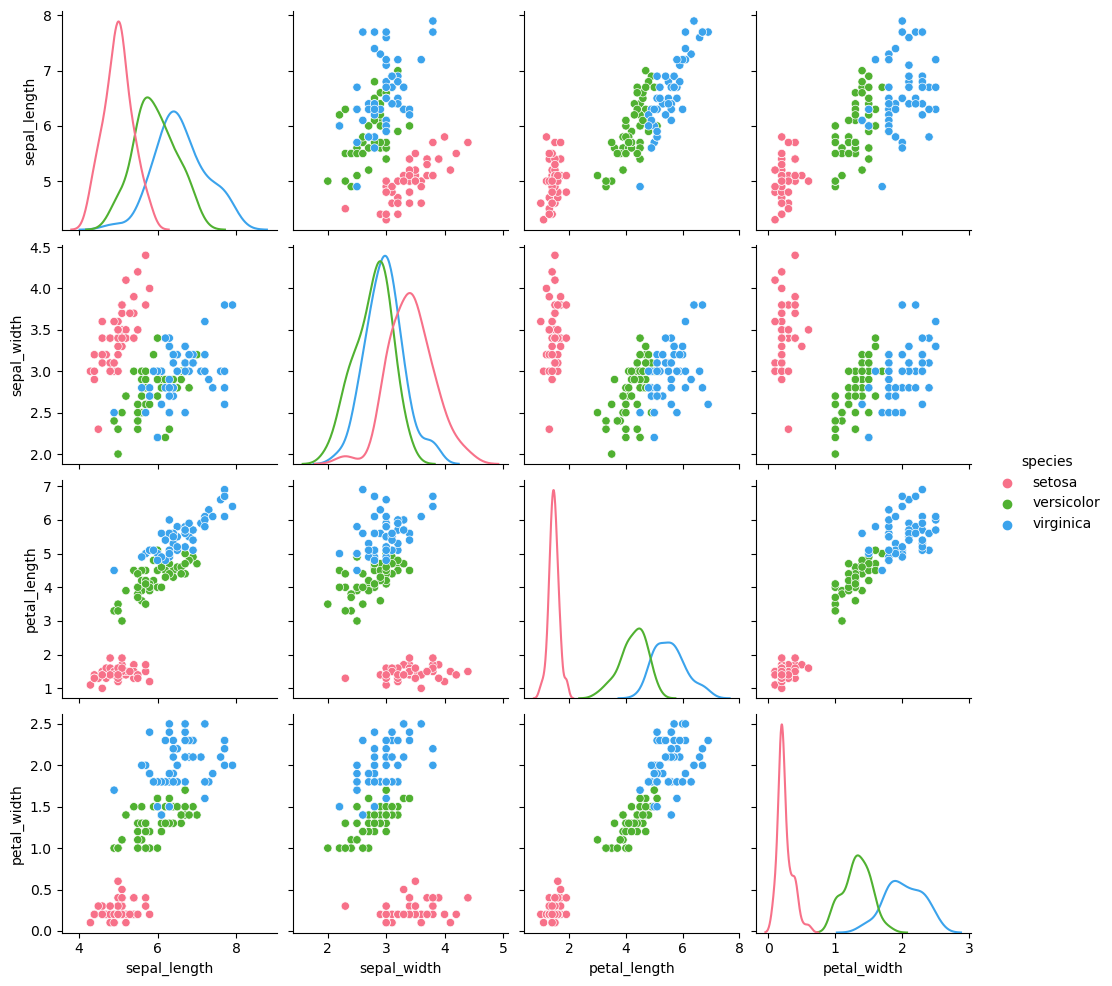

In [198]:
# YOUR CODE HERE

sns.pairplot(iris, hue='species', kind='scatter', palette='husl', diag_kws={'fill': False})

plt.savefig('/Users/astridblixmogensen/OneDrive - University of Copenhagen/Dokumenter/Økonomi/7. Semester/Introduction to Social Data Science/assignment1-kopi/figs/pairplot.png')